In [60]:
import numpy as np
import menzalib as mz
import pylab as pl
from scipy.optimize import curve_fit
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.interpolate import interpid

In [61]:
def mass(v):
    mass=0
    for i in range(len(v)): 
        if v[i]>v[mass]: mass=i
    return mass

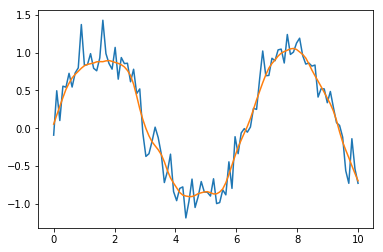

In [62]:


x = np.linspace(0,10,100)
y = np.sin(x) + np.random.normal(size=len(x))*0.2
z = np.transpose(lowess(y, x,frac=0.1))
pl.plot(x,y)
pl.plot(x,z[1])
pl.show()
pl.close()

In [79]:
files=[[0,1,0],
       [2,3,2],
       [4,5,3],
       [6,7,4]]
for i in range(len(files)):
    t1,v1=np.genfromtxt('dati/TEK000'+str(files[i][0])+'.CSV',delimiter=',',unpack='true')[3:5]
    scala1=np.genfromtxt('dati/TEK000'+str(files[i][0])+'.CSV',delimiter=',',unpack='true')[1][11]
    t2,v2=np.genfromtxt('dati/TEK000'+str(files[i][1])+'.CSV',delimiter=',',unpack='true')[3:5]
    scala2=np.genfromtxt('dati/TEK000'+str(files[i][1])+'.CSV',delimiter=',',unpack='true')[1][11]
    v1=v1*10
    t1,t2=(t1-t1[0]),(t2-t2[0])
    
    pl.plot(t1,v1)
    pl.plot(t2,v2*10)
    pl.xlabel('Voltaggio[V]')
    pl.ylabel('Tempo[s]')
    pl.savefig('immagini/voltaggio-tempo_'+str(i)+'.eps',format='eps')
    #pl.show()
    pl.close()
    
    mas=mass(v1)
    x=np.linspace(v1[0],v1.max(),len(v1[:mas]))
    pl.plot(x,v2[:mas])
    pl.ylabel('V_c[V]')
    pl.xlabel('U_a[V]')
    pl.savefig('immagini/corrente-voltaggio_'+str(i)+'.eps',format='eps')
    #pl.show()
    pl.close()